# 問題1 クロスバリデーション

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('../application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = np.array([[1,2],[3,4],
              [5,6],[7,8],[9,10],[11,12]])
y = np.array([1,2,3,4])
print(X.shape)
kf = KFold(n_splits=2)
print(kf.get_n_splits(X))#おそらく分割数

(6, 2)
2


In [4]:

print(kf.split(X))
print(X)

<generator object _BaseKFold.split at 0x1164cbf10>
[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]


In [5]:
kf = KFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print(train_index, test_index)
    

[3 4 5] [0 1 2]
[0 1 2] [3 4 5]


In [6]:
kf = KFold(n_splits=6, random_state=None, shuffle=False)
for train_index, test_index in kf.split(X):
    print(train_index, test_index)

[1 2 3 4 5] [0]
[0 2 3 4 5] [1]
[0 1 3 4 5] [2]
[0 1 2 4 5] [3]
[0 1 2 3 5] [4]
[0 1 2 3 4] [5]


# kf.splitによって格納したXの行のインデックスを返す。
#n_splits=2のときは2分割分テストを行う
#n_splits=6のときは6分割分テストを行う

# データの抽出

In [7]:
df.shape[0]
X = df.loc[:,['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']]


In [8]:
y = df.loc[:,'TARGET']

# 欠損値の平均値補完

In [11]:
X_imputed = X.fillna(X.mean().to_dict())
X_imputed

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
1,0.311267,0.622246,0.510853
2,0.502130,0.555912,0.729567
3,0.502130,0.650442,0.510853
4,0.502130,0.322738,0.510853
...,...,...,...
307506,0.145570,0.681632,0.510853
307507,0.502130,0.115992,0.510853
307508,0.744026,0.535722,0.218859
307509,0.502130,0.514163,0.661024


# クロスバリデーションによるaccuracyの評価

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
kf = KFold(n_splits=5, random_state=None, shuffle=False)

scores = []
auces = []
X_imputed = np.array(X_imputed)
for train_index, test_index in kf.split(X):
    #print(train_index,test_index)
    X_train,X_test = X_imputed[train_index,:],X_imputed[test_index,:]
    y_train,y_test = y[train_index],y[test_index]
    lr = LogisticRegression()
    lr = lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    
    score = accuracy_score(y_test,y_pred)
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    auc_val = auc(fpr,tpr)
    scores.append(score)
    auces.append(auc_val)
    
    
    
    

# 可視化:accuracy

Text(0.5, 1.0, 'accuracy scores with logistic regression')

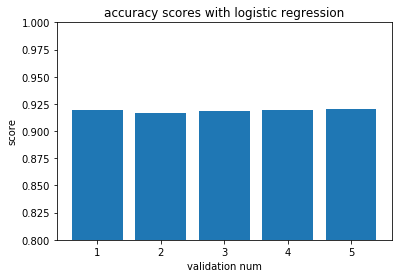

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1,len(scores)+1),scores)
plt.ylim(0.8,1.0)
plt.xlabel('validation num')
plt.ylabel('score')
plt.title('accuracy scores with logistic regression')

# 可視化:AUC

Text(0.5, 1.0, 'AUC scores with logistic regression')

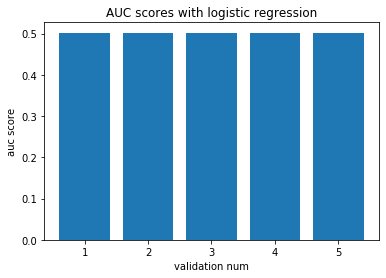

In [15]:
plt.bar(range(1,len(auces)+1),auces)
plt.xlabel('validation num')
plt.ylabel('auc score')
plt.title('AUC scores with logistic regression')

# ここまでのまとめ
ラベルに偏りがある場合、accuracyで評価して良い点数が出てもAUCで評価してみると全く良い
結果を出せていないことがわかる。

# 問題2 グリッドサーチ

In [149]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
param_range = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

lr = LogisticRegression()
#grid_auc = make_score(aux)
param_grid = {'C':param_range,'penalty':['l1','l2']}
gs = GridSearchCV(param_grid=param_grid,estimator=lr,
                 scoring='roc_auc',cv=4)



In [ ]:
corr = df.corr()
corr['corr'] = corr.columns
target_corr = corr.loc[:,['corr','TARGET']]

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

def get_topn(df,target_corr,num):
    topn_columns = target_corr.iloc[1:num+1,0]
    df_topn = df.loc[:,topn_columns]
    imr = SimpleImputer(missing_values=np.nan,strategy='mean')
    sc = StandardScaler()
    X = imr.fit_transform(df_topn)
    topn_X_standard = sc.fit_transform(X)
    return topn_X_standard

In [41]:
target_corr.loc[:,'TARGET'] = np.abs(target_corr.loc[:,'TARGET'])
target_corr.head()

,corr,TARGET
SK_ID_CURR,SK_ID_CURR,0.002108
TARGET,TARGET,1.000000
CNT_CHILDREN,CNT_CHILDREN,0.019187
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,0.003982
AMT_CREDIT,AMT_CREDIT,0.030369


In [42]:
target_corr = target_corr.sort_values('TARGET',ascending=False)

In [43]:
X_top3 = get_topn(df,target_corr,3)
#gs.fit(X_top3,y)

In [44]:
X_top3

array([[-2.12924902e+00, -1.31746339e+00, -3.00651798e+00],
       [ 0.00000000e+00,  5.65105814e-01, -1.36922292e+00],
       [ 1.25363334e+00,  2.17544598e-01,  7.96459681e-16],
       ...,
       [-1.67366311e+00,  1.11755579e-01,  1.73533498e+00],
       [ 8.60754675e-01, -1.20433892e-03,  7.96459681e-16],
       [-2.27514385e+00,  1.01740340e+00,  1.66670448e+00]])

In [ ]:
#gs.best_score_

# 標準化

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_standard = sc.fit_transform(X_imputed)
gs = GridSearchCV(estimator=lr,param_grid=param_grid, scoring='roc_auc',
                 cv=4,)
gs.fit(X_standard,y)



//anaconda3/envs/aistudio/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda3/envs/aistudio/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda3/envs/aistudio/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda

GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [46]:
gs.best_params_

{'C': 0.0001, 'penalty': 'l2'}

In [47]:
gs.best_score_

0.7190256105441455

標準化してもベストスコアはあまり変化しなかった

# 問題3 kernelからの調査

・別のファイルとマージして分析する。<br>
・相関係数をグラフで可視化する<br>
・重要でない値をnanや０に変換<br>
・グループ化して平均を分析<br>
・新しい特徴量を生成する<br>
・相関性の高い特徴量<br>
・平均値補完<br>
・標準化

# 問題4 高い汎化性能のモデル作成

# 特徴量を増やしてみる

In [162]:
top10_columns = target_corr.iloc[1:11,0]
top10_columns

EXT_SOURCE_3                                  EXT_SOURCE_3
EXT_SOURCE_2                                  EXT_SOURCE_2
EXT_SOURCE_1                                  EXT_SOURCE_1
DAYS_BIRTH                                      DAYS_BIRTH
REGION_RATING_CLIENT_W_CITY    REGION_RATING_CLIENT_W_CITY
REGION_RATING_CLIENT                  REGION_RATING_CLIENT
DAYS_LAST_PHONE_CHANGE              DAYS_LAST_PHONE_CHANGE
DAYS_ID_PUBLISH                            DAYS_ID_PUBLISH
REG_CITY_NOT_WORK_CITY              REG_CITY_NOT_WORK_CITY
FLAG_EMP_PHONE                              FLAG_EMP_PHONE
Name: corr, dtype: object

In [49]:
df_top10 = get_topn(df,target_corr,10)
df_top10

array([[-2.12924902e+00, -1.31746339e+00, -3.00651798e+00, ...,
         5.79153700e-01, -5.47235516e-01,  4.68696861e-01],
       [ 0.00000000e+00,  5.65105814e-01, -1.36922292e+00, ...,
         1.79085496e+00, -5.47235516e-01,  4.68696861e-01],
       [ 1.25363334e+00,  2.17544598e-01,  7.96459681e-16, ...,
         3.06868726e-01, -5.47235516e-01,  4.68696861e-01],
       ...,
       [-1.67366311e+00,  1.11755579e-01,  1.73533498e+00, ...,
        -1.42820268e+00,  1.82736678e+00,  4.68696861e-01],
       [ 8.60754675e-01, -1.20433892e-03,  7.96459681e-16, ...,
         1.36685889e+00,  1.82736678e+00,  4.68696861e-01],
       [-2.27514385e+00,  1.01740340e+00,  1.66670448e+00, ...,
         1.71201819e+00,  1.82736678e+00,  4.68696861e-01]])

In [156]:
gs = GridSearchCV(estimator=lr,param_grid=param_grid,
                  cv=4,scoring='roc_auc')
gs.fit(df_top10,y)


//anaconda3/envs/aistudio/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda3/envs/aistudio/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda3/envs/aistudio/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda

GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [51]:
gs.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [52]:
gs.best_score_

0.7234783170618511

In [53]:
top_5_standard = get_topn(df,target_corr,5)
print(top_5_standard.shape)

(307511, 5)


In [54]:
gs.fit(top_5_standard,y)


//anaconda3/envs/aistudio/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda3/envs/aistudio/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda3/envs/aistudio/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda

GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [55]:
print('top5 best_score:', gs.best_score_)
print('top5 best_param:', gs.best_params_)

top5 best_score: 0.7207406676747612
top5 best_param: {'C': 0.001, 'penalty': 'l2'}


In [56]:
#top_15_X = get_topn(df, target_corr, 15)
#gs.fit(top_15_X,y)

In [57]:
#print(gs.best_params_)
#print(gs.best_score_)

top5の特徴量を使用した結果、AUCは0.7207<br>
top10の特徴量を使用した結果、AUCは0.7234であった。
top15は処理不可

# 分類器を変更してみる

In [58]:
top3_X = get_topn(df,target_corr,3)

In [59]:
import time
from tqdm import tqdm
from sklearn.svm import SVC
for _  in tqdm(range(100)):
    time.sleep(0.1)
    param_range = [0.0001,0.001,0.01,0.1,1,10,100,1000,1000]
    svm = SVC(random_state=1)
    param_grid=[{'C':param_range,'kernel':['linear']},
                         {'C':param_range,'gamma':param_range,'kernel':['rbf']}]
    gs_svm = GridSearchCV(estimator=svm, param_grid=param_grid,cv=4,scoring='roc_auc')
    gs_svm.fit(top3_X[:100],y[:100])
    

100%|█████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:31<00:00,  1.51s/it]


In [60]:
gs_svm.best_score_

0.7631340579710145

In [61]:
gs_svm.best_params_

{'C': 10, 'kernel': 'linear'}

データ100個で実行した場合、0.78でベストパラムがC=0.01,kernel=Cであった
この値を利用してcrossvalidationを実行する

In [62]:
random = np.random.permutation(range(top3_X.shape[0]))
top3_X = top3_X[random]


In [63]:
kf = KFold(n_splits=5, random_state=None, shuffle=True)
from sklearn.svm import SVC


scores = []
auces = []
for train_index, test_index in kf.split(top3_X[:1000,:]):
    #print(train_index,test_index)
    X_train,X_test = top3_X[train_index,:],top3_X[test_index,:]
    y_train,y_test = y[train_index],y[test_index]
    svm = SVC(C=100,kernel='linear')
    svm = svm.fit(X_train,y_train)
    y_pred = svm.predict(X_test)
    
    score = accuracy_score(y_test,y_pred)
    print(score)
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    print(fpr,tpr)
    auc_val = auc(fpr,tpr)
    scores.append(score)
    auces.append(auc_val)

0.935
[0. 1.] [0. 1.]
0.93
[0. 1.] [0. 1.]
0.92
[0. 1.] [0. 1.]
0.935
[0. 1.] [0. 1.]
0.93
[0. 1.] [0. 1.]


In [64]:
print(auces)

[0.5, 0.5, 0.5, 0.5, 0.5]


In [65]:
mask1 = df.loc[:,'TARGET'] == 1
df_target1 = df.loc[mask1,'TARGET']
df_target1.shape

(24825,)

In [66]:
target1_percent = df_target1.shape[0]/df.loc[:,'TARGET'].shape[0]
target1_percent

0.08072881945686496

In [67]:
import pandas as pd
bureau_df = pd.read_csv('../Home_Credit_Data/bureau.csv')
bureau_balance_df = pd.read_csv('../Home_Credit_Data/bureau_balance.csv')

In [68]:
bureau_df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [69]:
bureau_balance_df.head(5)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [70]:
print(bureau_df.shape)
print(bureau_balance_df.shape)
print(df.shape)

(1716428, 17)
(27299925, 3)
(307511, 122)


In [71]:
bureau_merge_df = df.merge(bureau_df,how='left',left_on='SK_ID_CURR',
                          right_on='SK_ID_CURR')

In [72]:
print(bureau_merge_df.shape)

(1509345, 138)


In [73]:
df.shape

(307511, 122)

In [74]:
ohe_bureau = pd.get_dummies(bureau_df)

In [75]:
ohe_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,...,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,...,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [76]:
bureau_groupbyid = ohe_bureau.groupby('SK_ID_CURR').mean()

In [77]:
bureau_groupbyid.shape

(305811, 36)

In [78]:
bureau_merge_byid = df.merge(bureau_groupbyid,how='left',left_on='SK_ID_CURR',
                          right_on='SK_ID_CURR')

In [79]:
bureau_merge_byid.shape

(307511, 158)

In [80]:
bureau_merge_byid.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
def make_corr(df_corr, var_name):
    #print(df_corr.shape)
    #print(df_corr.columns.shape)
    df_corr['corr'] = df_corr.columns
    var_corr= df_corr.loc[:,['corr',var_name]]
    #print(var_corr.head())
    var_corr[var_name] = np.abs(var_corr.iloc[:,1])
    df_var = var_corr.sort_values(var_name, ascending=False)
    df_var = pd.DataFrame(data=df_var)
    del df_corr['corr']
    #print(df_corr.shape)
    return df_var

def make_gragh(df_var,var_name):
    
    fig = plt.figure(1,figsize=(20,10))
    top20_var = df_var.iloc[1:21,:]
    sns.barplot(data=top20_var,x="corr",y=var_name)
    plt.xticks(rotation=90)

In [82]:
bureau_merge_byid_corr = bureau_merge_byid.corr()

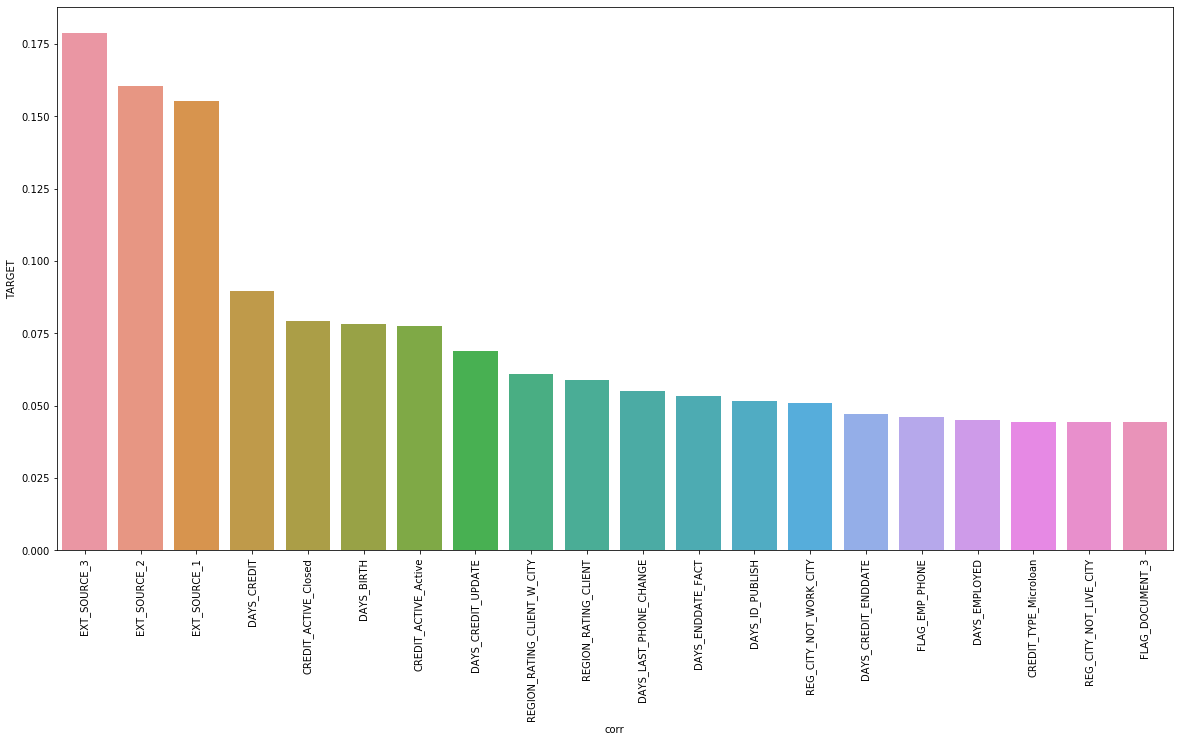

In [83]:
import seaborn as sns
bureau_merge_bar = make_corr(bureau_merge_byid_corr, 'TARGET')
make_gragh(bureau_merge_bar,'TARGET')

In [84]:
#np.unique(bureau_balance_df.loc[:,'STATUS'])
mask_C = bureau_balance_df.loc[:,'STATUS'] == 'C'
mask_X = bureau_balance_df.loc[:,'STATUS'] == 'X'

In [85]:
#bureau_balance_df.loc[mask_C,'STATUS']

In [86]:
bureau_balance_df.loc[mask_C,'STATUS'] = 0
bureau_balance_df.loc[mask_X,'STATUS'] = np.nan

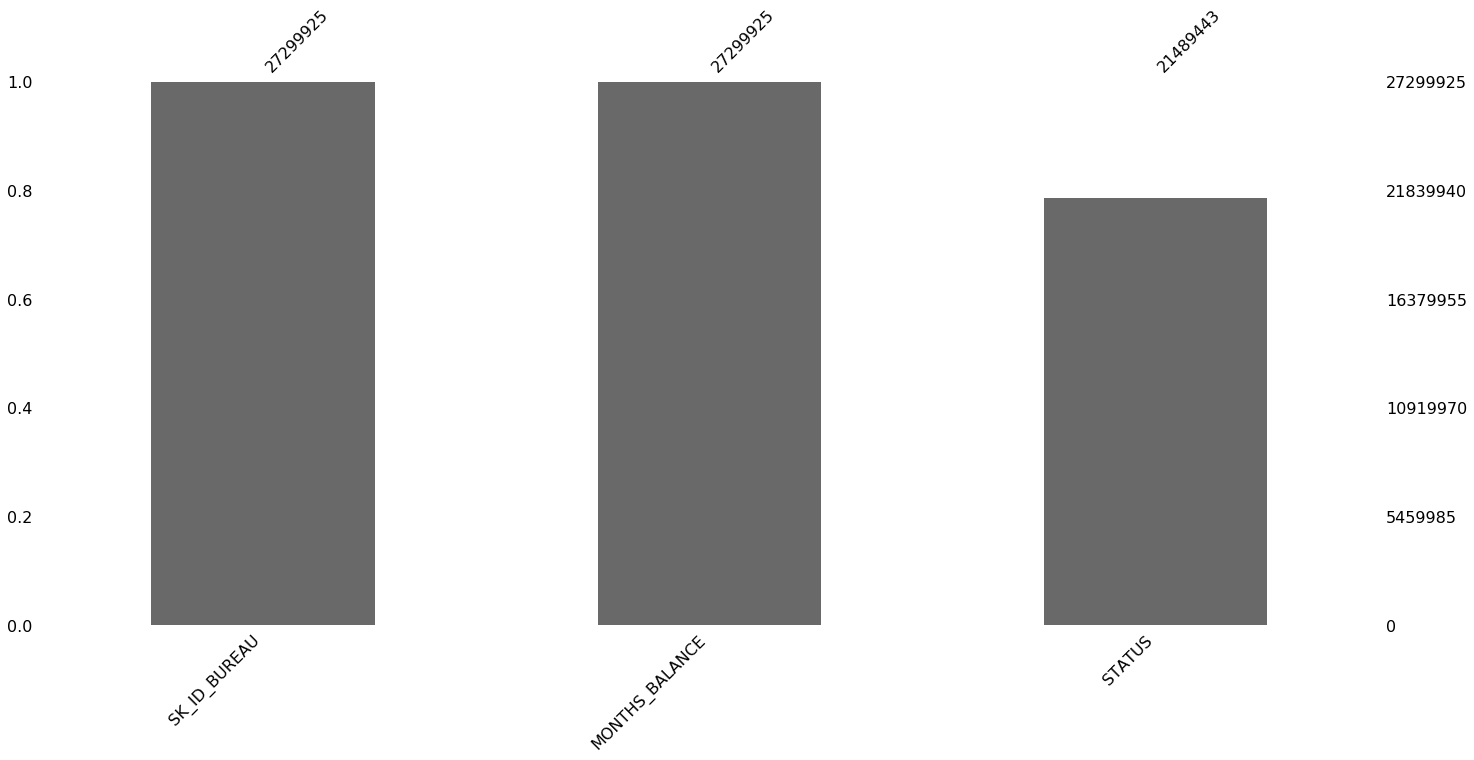

In [89]:
import missingno as msno
msno.bar(bureau_balance_df)

In [90]:
pd.set_option('display.max_rows', 2000)
bureau_balance_df

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,0
1,5715448,-1,0
2,5715448,-2,0
3,5715448,-3,0
4,5715448,-4,0
...,...,...,...
27299920,5041336,-47,NaN
27299921,5041336,-48,NaN
27299922,5041336,-49,NaN
27299923,5041336,-50,NaN


In [98]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer()
bureau_balance_imputed = imr.fit_transform(bureau_balance_df.values)
bureau_balance_imputed

array([[ 5.71544800e+06,  0.00000000e+00,  0.00000000e+00],
       [ 5.71544800e+06, -1.00000000e+00,  0.00000000e+00],
       [ 5.71544800e+06, -2.00000000e+00,  0.00000000e+00],
       ...,
       [ 5.04133600e+06, -4.90000000e+01,  3.03113952e-02],
       [ 5.04133600e+06, -5.00000000e+01,  3.03113952e-02],
       [ 5.04133600e+06, -5.10000000e+01,  3.03113952e-02]])

In [99]:
balance_imputed_df = pd.DataFrame(data=bureau_balance_imputed,columns=bureau_balance_df.columns)
balance_imputed_df

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448.0,0.0,0.000000
1,5715448.0,-1.0,0.000000
2,5715448.0,-2.0,0.000000
3,5715448.0,-3.0,0.000000
4,5715448.0,-4.0,0.000000
...,...,...,...
27299920,5041336.0,-47.0,0.030311
27299921,5041336.0,-48.0,0.030311
27299922,5041336.0,-49.0,0.030311
27299923,5041336.0,-50.0,0.030311


In [100]:
balance_sum= balance_imputed_df.groupby('SK_ID_BUREAU').sum()
balance_sum.shape


(817395, 2)

In [101]:
balance_sum['ID'] = balance_sum.index

In [102]:
balance_sum.head()

,MONTHS_BALANCE,STATUS,ID
SK_ID_BUREAU,,,
5001709.0,-4656.0,0.333425,5001709.0
5001710.0,-3403.0,0.909342,5001710.0
5001711.0,-6.0,0.030311,5001711.0
5001712.0,-171.0,0.000000,5001712.0
5001713.0,-231.0,0.666851,5001713.0


In [96]:
ohe_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Interbank credit,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,...,0,0,0,0,0,0,0,0,0,0
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,...,0,0,0,0,0,0,0,0,0,0
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,...,0,0,0,0,0,0,0,0,0,0
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [103]:
balance_bureau_merge = ohe_bureau.merge(balance_sum, how='left',left_on='SK_ID_BUREAU',right_on='ID')
balance_bureau_merge.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,MONTHS_BALANCE,STATUS,ID
0,215354,5714462,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,215354,5714463,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,215354,5714464,-203,0,528.0,NaN,NaN,0,464323.5,NaN,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,215354,5714465,-203,0,NaN,NaN,NaN,0,90000.0,NaN,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,215354,5714466,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [104]:
bureau_groupmean = balance_bureau_merge.groupby('SK_ID_CURR').mean()
bureau_groupmean.head()

,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,...,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,MONTHS_BALANCE,STATUS,ID
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,5896633.000,-735.000000,0.0,82.428571,-825.500000,NaN,0.0,207623.571429,85240.928571,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-400.000000,0.272763,5896633.000
100002,6153272.125,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.200000,7997.14125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-337.625000,3.431834,6153272.125
100003,5885878.500,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.000000,202500.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
100004,6829133.500,-867.000000,0.0,-488.500000,-532.500000,0.000,0.0,94518.900000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
100005,6735201.000,-190.666667,0.0,439.333333,-123.000000,0.000,0.0,219042.000000,189469.500000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-30.333333,0.020208,6735201.000


In [105]:
bureau_groupmean.shape
bureau_groupmean['SK_ID'] = bureau_groupmean.index

In [106]:
bureau_groupmean.head()

,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,...,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,MONTHS_BALANCE,STATUS,ID,SK_ID
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,5896633.000,-735.000000,0.0,82.428571,-825.500000,NaN,0.0,207623.571429,85240.928571,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,-400.000000,0.272763,5896633.000,100001
100002,6153272.125,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.200000,7997.14125,...,0.0,0.0,0.0,0.0,0.0,0.0,-337.625000,3.431834,6153272.125,100002
100003,5885878.500,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.000000,202500.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,100003
100004,6829133.500,-867.000000,0.0,-488.500000,-532.500000,0.000,0.0,94518.900000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,100004
100005,6735201.000,-190.666667,0.0,439.333333,-123.000000,0.000,0.0,219042.000000,189469.500000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,-30.333333,0.020208,6735201.000,100005


In [112]:
# del bureau_groupmean['SK_ID_CURR']
bureau_groupmean.head()

,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,...,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,MONTHS_BALANCE,STATUS,ID,SK_ID
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,5896633.000,-735.000000,0.0,82.428571,-825.500000,NaN,0.0,207623.571429,85240.928571,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,-400.000000,0.272763,5896633.000,100001
100002,6153272.125,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.200000,7997.14125,...,0.0,0.0,0.0,0.0,0.0,0.0,-337.625000,3.431834,6153272.125,100002
100003,5885878.500,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.000000,202500.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,100003
100004,6829133.500,-867.000000,0.0,-488.500000,-532.500000,0.000,0.0,94518.900000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,100004
100005,6735201.000,-190.666667,0.0,439.333333,-123.000000,0.000,0.0,219042.000000,189469.500000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,-30.333333,0.020208,6735201.000,100005


In [113]:
bureau_merge_byid = df.merge(bureau_groupmean,how='left',left_on='SK_ID_CURR',
                          right_on='SK_ID')
bureau_merge_byid.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,MONTHS_BALANCE,STATUS,ID,SK_ID
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,-337.625,3.431834,6153272.125,100002.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,100003.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,100004.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,100007.0


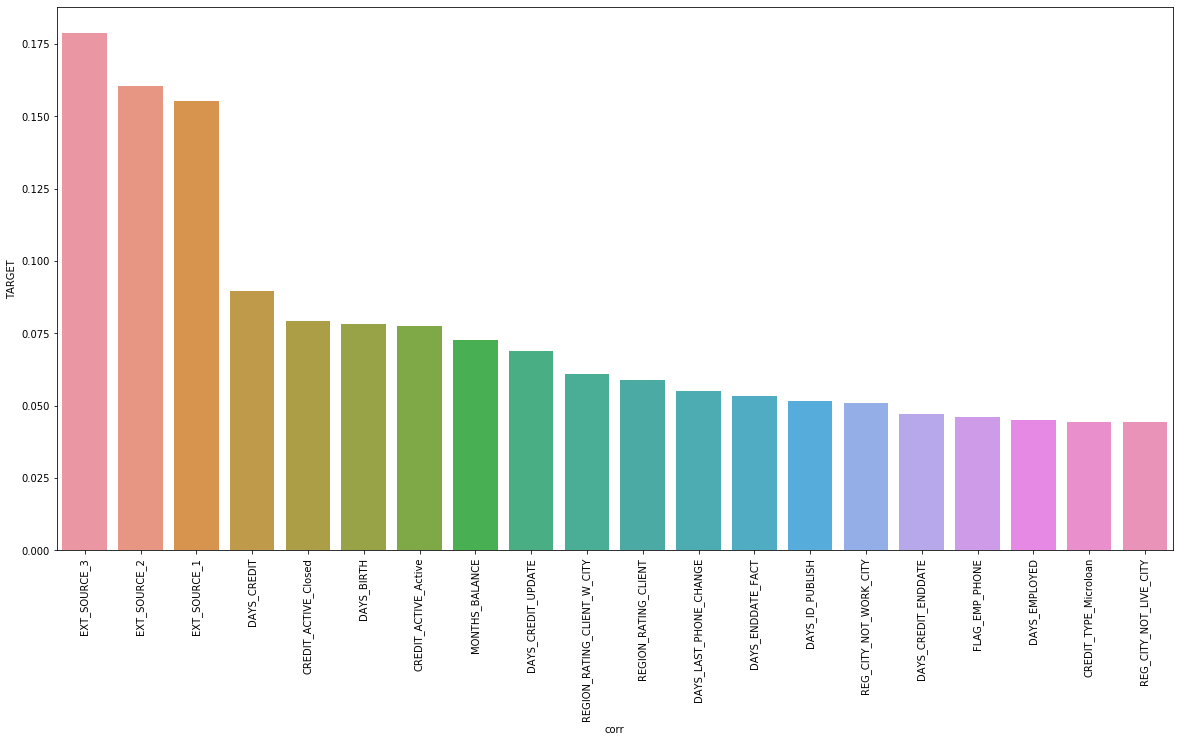

In [114]:
bureau_merge_byid_corr = bureau_merge_byid.corr()
bar = make_corr(bureau_merge_byid_corr, 'TARGET')
make_gragh(bar,'TARGET')

In [115]:
df_top10 = get_topn(bureau_merge_byid,bar,10)
df_top10

array([[-2.12924902e+00, -1.31746339e+00, -3.00651798e+00, ...,
         1.08246211e+00,  1.11322988e-01, -6.26985339e-02],
       [ 0.00000000e+00,  5.65105814e-01, -1.36922292e+00, ...,
         5.72783481e-16, -6.41325903e-01, -2.05181324e+00],
       [ 1.25363334e+00,  2.17544598e-01,  7.96459681e-16, ...,
         5.72783481e-16,  3.48379089e-02, -6.26985339e-02],
       ...,
       [-1.67366311e+00,  1.11755579e-01,  1.73533498e+00, ...,
         8.80616950e-01,  6.98502214e-01,  1.92641617e+00],
       [ 8.60754675e-01, -1.20433892e-03,  7.96459681e-16, ...,
         2.55243327e-01,  3.46730371e-01, -6.26985339e-02],
       [-2.27514385e+00,  1.01740340e+00,  1.66670448e+00, ...,
         1.62035577e-01,  3.70023257e-02, -2.05181324e+00]])

In [116]:
param_range = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

lr = LogisticRegression()
#grid_auc = make_score(aux)
param_grid = {'C':param_range,'penalty':['l1','l2']}
gs = GridSearchCV(param_grid=param_grid,estimator=lr,
                 scoring='roc_auc',cv=4)

gs = GridSearchCV(estimator=lr,param_grid=param_grid,
                  cv=4,scoring='roc_auc')
gs.fit(df_top10,y)


//anaconda3/envs/aistudio/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda3/envs/aistudio/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda3/envs/aistudio/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda

GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [117]:
gs.best_params_

{'C': 10, 'penalty': 'l2'}

In [118]:
gs.best_score_

0.7213987503416659

KeyboardInterrupt: 

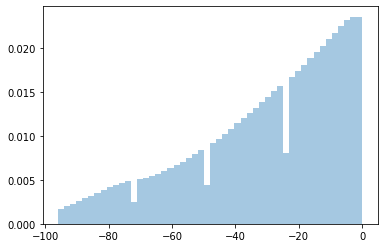

In [120]:
# sns.distplot(balance_imputed_df.loc[:,'MONTHS_BALANCE'])

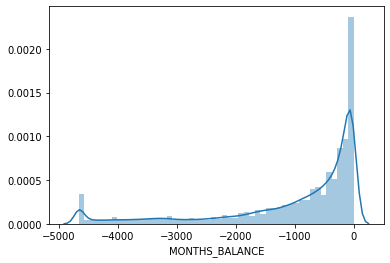

In [121]:
sns.distplot(balance_sum.loc[:,'MONTHS_BALANCE'])

(-2000, 0)

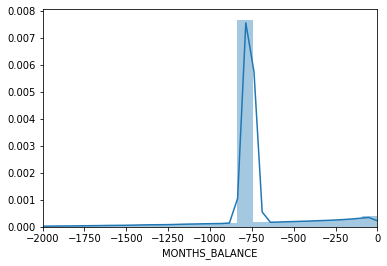

In [122]:
bureau_merge_byid = pd.get_dummies(bureau_merge_byid)

bureau_merge_byid_imputed = imr.fit_transform(bureau_merge_byid)
bureau_merge_byid_imputed_df = pd.DataFrame(data=bureau_merge_byid_imputed,
                                           columns = bureau_merge_byid.columns)
sns.distplot(bureau_merge_byid_imputed_df.loc[:,'MONTHS_BALANCE'])
plt.xlim(-2000,0)

In [123]:
bureau_merge_byid.loc[:,'MONTHS_BALANCE'].isnull().sum()/bureau_merge_byid.shape[0]

0.700072517731073

In [124]:
balance_bureau_merge
bureau_groupsum = balance_bureau_merge.groupby('SK_ID_CURR').sum()
bureau_groupsum

,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,...,CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan,MONTHS_BALANCE,STATUS,ID
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100001,41276431,-5145,0,577.0,-3302.0,0.000,0,1453365.000,596686.500,0.000,...,0,0,0,0,0,0,0,-2800.0,1.909342,41276431.0
100002,49226177,-6992,0,-2094.0,-4185.0,8405.145,0,865055.565,245781.000,31988.565,...,0,0,0,0,0,0,0,-2701.0,27.454671,49226177.0
100003,23543514,-5603,0,-2178.0,-3292.0,0.000,0,1017400.500,0.000,810000.000,...,0,0,0,0,0,0,0,0.0,0.000000,0.0
100004,13658267,-1734,0,-977.0,-1065.0,0.000,0,189037.800,0.000,0.000,...,0,0,0,0,0,0,0,0.0,0.000000,0.0
100005,20205603,-572,0,1318.0,-123.0,0.000,0,657126.000,568408.500,0.000,...,0,0,0,0,0,0,0,-91.0,0.060623,20205603.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456249,69832100,-21672,0,-14788.0,-16377.0,30735.000,0,3693858.660,163071.000,0.000,...,0,0,0,0,0,0,0,0.0,0.000000,0.0
456250,20451711,-2586,0,3865.0,-760.0,0.000,0,3086459.550,2232040.095,58268.385,...,0,0,0,0,0,0,0,-1231.0,1.515570,20451711.0
456253,23540074,-3470,0,1122.0,-1588.0,0.000,0,3960000.000,1795833.000,0.000,...,0,0,0,0,0,0,0,-1671.0,0.394048,23540074.0


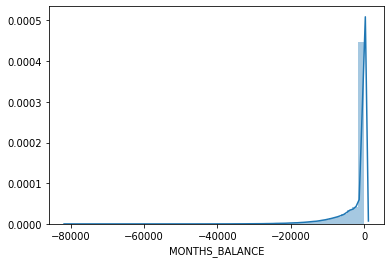

In [125]:
sns.distplot(bureau_groupsum.loc[:,'MONTHS_BALANCE'])

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [127]:
test_month = bureau_groupsum.loc[:,'MONTHS_BALANCE']
mms = MinMaxScaler()
test_month_minmax = mms.fit_transform(np.array(test_month).reshape(-1,1))

In [128]:

bureau_groupsum['minmax_monthbalance'] = test_month_minmax
testcorr = bureau_groupsum.loc[:,['MONTHS_BALANCE','TARGET','minmax_monthbalance']].corr()

//anaconda3/envs/aistudio/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [129]:
testcorr

,MONTHS_BALANCE,TARGET,minmax_monthbalance
MONTHS_BALANCE,1.0,NaN,1.0
TARGET,NaN,NaN,NaN
minmax_monthbalance,1.0,NaN,1.0


In [130]:
df_top10

array([[-2.12924902e+00, -1.31746339e+00, -3.00651798e+00, ...,
         1.08246211e+00,  1.11322988e-01, -6.26985339e-02],
       [ 0.00000000e+00,  5.65105814e-01, -1.36922292e+00, ...,
         5.72783481e-16, -6.41325903e-01, -2.05181324e+00],
       [ 1.25363334e+00,  2.17544598e-01,  7.96459681e-16, ...,
         5.72783481e-16,  3.48379089e-02, -6.26985339e-02],
       ...,
       [-1.67366311e+00,  1.11755579e-01,  1.73533498e+00, ...,
         8.80616950e-01,  6.98502214e-01,  1.92641617e+00],
       [ 8.60754675e-01, -1.20433892e-03,  7.96459681e-16, ...,
         2.55243327e-01,  3.46730371e-01, -6.26985339e-02],
       [-2.27514385e+00,  1.01740340e+00,  1.66670448e+00, ...,
         1.62035577e-01,  3.70023257e-02, -2.05181324e+00]])

In [131]:
bureau_df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [132]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0


In [134]:
dummies_corr = df_dummies.corr()
dummies_corr['corr'] = df_dummies.columns
dummies_target_corr = dummies_corr.loc[:,['corr','TARGET']]
dummies_target_corr.head()

,corr,TARGET
SK_ID_CURR,SK_ID_CURR,-0.002108
TARGET,TARGET,1.000000
CNT_CHILDREN,CNT_CHILDREN,0.019187
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,-0.003982
AMT_CREDIT,AMT_CREDIT,-0.030369


In [135]:
top_20 = get_topn(df_dummies,dummies_target_corr,20)

In [136]:
top_20

array([[ 3.37448515, -0.57753784,  0.14212925, ..., -0.24521525,
        -1.26572351, -0.10306435],
       [-0.2963415 , -0.57753784,  0.42679193, ..., -0.24521525,
        -0.16763949, -2.06757324],
       [-0.2963415 , -0.57753784, -0.4271961 , ..., -0.24521525,
        -1.26572351, -0.10306435],
       ...,
       [-0.2963415 , -0.57753784, -0.06662338, ...,  4.07804973,
        -1.26572351,  1.86144454],
       [ 3.37448515, -0.57753784,  0.00928667, ..., -0.24521525,
        -0.16763949, -0.10306435],
       [-0.2963415 , -0.57753784, -0.04764587, ..., -0.24521525,
        -0.16763949, -2.06757324]])

In [138]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def get_topn(df,target_corr,num):
    topn_columns = target_corr.iloc[1:num+1,0]
    df_topn = df.loc[:,topn_columns]
    imr = SimpleImputer(missing_values=np.nan,strategy='mean')
    sc = StandardScaler()
    X = imr.fit_transform(df_topn)
    topn_X_standard = sc.fit_transform(X)
    return topn_X_standard,

In [140]:
df['DAYS_EMPLOYED_PERC'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
df['INCOME_CREDIT_PERC'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
df['INCOME_PER_PERSON'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
df['ANNUITY_INCOME_PERC'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

In [141]:
corr = df.corr()
corr['corr'] = corr.columns
target_corr = corr.loc[:,['corr','TARGET']]
target_corr.head()

,corr,TARGET
SK_ID_CURR,SK_ID_CURR,-0.002108
TARGET,TARGET,1.000000
CNT_CHILDREN,CNT_CHILDREN,0.019187
AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,-0.003982
AMT_CREDIT,AMT_CREDIT,-0.030369


In [144]:
target_corr.loc[:,'TARGET'] = np.abs(target_corr.loc[:,'TARGET'])
target_corr.head()
target_corr = target_corr.sort_values('TARGET',ascending=False)

In [145]:
top5 = get_topn(df,target_corr,5)

In [146]:
top5

array([[-2.12924902e+00, -1.31746339e+00, -3.00651798e+00,
         1.50687967e+00, -6.26985339e-02],
       [ 0.00000000e+00,  5.65105814e-01, -1.36922292e+00,
        -1.66821268e-01, -2.05181324e+00],
       [ 1.25363334e+00,  2.17544598e-01,  7.96459681e-16,
        -6.89509089e-01, -6.26985339e-02],
       ...,
       [-1.67366311e+00,  1.11755579e-01,  1.73533498e+00,
         2.45416957e-01,  1.92641617e+00],
       [ 8.60754675e-01, -1.20433892e-03,  7.96459681e-16,
         9.34008321e-01, -6.26985339e-02],
       [-2.27514385e+00,  1.01740340e+00,  1.66670448e+00,
        -1.87673785e-01, -2.05181324e+00]])

In [150]:
param_range = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

lr = LogisticRegression()
#grid_auc = make_score(aux)
param_grid = {'C':param_range,'penalty':['l1','l2']}
gs = GridSearchCV(param_grid=param_grid,estimator=lr,
                 scoring='roc_auc',cv=4)

gs = GridSearchCV(estimator=lr,param_grid=param_grid,
                  cv=4,scoring='roc_auc')
gs.fit(top5,y)


//anaconda3/envs/aistudio/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda3/envs/aistudio/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda3/envs/aistudio/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
//anaconda

GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [151]:
gs.best_score_

0.7207406676747612

In [154]:
analysis_df = pd.DataFrame()
analysis_df['how'] = ['standardize', 'top10_corr', 'top5_corr',
                     'chmod2SVM']
analysis_df['score'] = [0.7190256105441455, 0.7234783170618511, 0.7207406676747612,
0.7631340579710145]

In [155]:
analysis_df

,how,score
0,standardize,0.719026
1,top10_corr,0.723478
2,top5_corr,0.720741
3,chmod2SVM,0.763134


モデルをSVMに変換したものがもっとも良いスコアだが、これはSVMの処理時間が遅く、データ数１００個で学習したものなのであまり正確ではない

# 問題5 最終的なモデルの選定

SVMモデルで学習させたものは選定せず、代わりにtop10_corrモデルを使用する。アイデアとしては、目的変数との相関性がtop10のものを使用するというものである。

In [157]:
test_df = pd.read_csv('./application_test.csv')
test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
top10_test_df = test_df.loc[:,['EXT_SOURCE_3','EXT_SOURCE_2',
                              'EXT_SOURCE_1', 'DAYS_BIRTH',
                               'REGION_RATING_CLIENT_W_CITY', 
                              'REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE',
                              'DAYS_ID_PUBLISH', 'REG_CITY_NOT_WORK_CITY',
                              'FLAG_EMP_PHONE']]

In [164]:
top10_test_arr = np.array(top10_test_df)

In [165]:
from sklearn.impute import SimpleImputer
smp = SimpleImputer()
top10_imputed = smp.fit_transform(top10_test_df)
y_pred = gs.predict(top10_imputed)

In [169]:
y_pred_df = pd.DataFrame()

In [170]:
y_pred_df['SK_ID_CURR'] = list(test_df.loc[:,'SK_ID_CURR'])

In [171]:
y_pred_df['TARGET'] = y_pred

In [172]:
y_pred_df.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


In [174]:
y_pred_df.to_csv('submission.csv', header=True, index=False)

In [175]:
submmision_csv = pd.read_csv('./sample_submission.csv')

In [177]:
submmision_csv

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5
...,...,...
48739,456221,0.5
48740,456222,0.5
48741,456223,0.5
48742,456224,0.5


In [181]:
submmision_csv.loc[:,'SK_ID_CURR'] =  list(test_df.loc[:,'SK_ID_CURR'])

In [182]:
submmision_csv.loc[:,'TARGET'] =y_pred

In [183]:
submmision_csv

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,1


In [184]:
submmision_csv.to_csv('submission.csv', header=True, index=False)

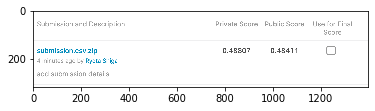

In [185]:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('./result.png')
plt.imshow(img)

残念ながらスコアは0.48とかなり低いスコアとなってしまった。